In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
de_train =   pd.read_parquet("/kaggle/input/open-problems-single-cell-perturbations/de_train.parquet")
id_map = pd.read_csv("/kaggle/input/open-problems-single-cell-perturbations/id_map.csv")
sample_submission = pd.read_csv("/kaggle/input/open-problems-single-cell-perturbations/sample_submission.csv")

In [3]:
de_train

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.455549,0.188181,0.595734,-0.100299,0.786192,...,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.338168,-0.109079,0.270182,-0.436586,-0.069476,...,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,...,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112


In [4]:
id_map.head()

,id,cell_type,sm_name
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1,1,B cells,ABT-199 (GDC-0199)
2,2,B cells,ABT737
3,3,B cells,AMD-070 (hydrochloride)
4,4,B cells,AT 7867


In [5]:
sample_submission.head()

,id,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
de_train.isnull().sum()

cell_type      0
sm_name        0
sm_lincs_id    0
SMILES         0
control        0
              ..
ZXDB           0
ZXDC           0
ZYG11B         0
ZYX            0
ZZEF1          0
Length: 18216, dtype: int64

In [7]:
unique = de_train['sm_name'].unique()
unique, print({len(unique)})

{146}


(array(['Clotrimazole', 'Mometasone Furoate', 'Idelalisib', 'Vandetanib',
        'Bosutinib', 'Ceritinib', 'Lamivudine', 'Crizotinib',
        'Cabozantinib', 'Flutamide', 'Dasatinib', 'Selumetinib',
        'Trametinib', 'ABT-199 (GDC-0199)', 'Oxybenzone', 'Vorinostat',
        'Raloxifene', 'Linagliptin', 'Lapatinib', 'Canertinib',
        'Disulfiram', 'Vardenafil', 'Palbociclib', 'Ricolinostat',
        'Dabrafenib', 'Proscillaridin A;Proscillaridin-A', 'IN1451',
        'Ixabepilone', 'CEP-18770 (Delanzomib)', 'RG7112', 'MK-5108',
        'Resminostat', 'IMD-0354', 'Alvocidib', 'LY2090314',
        'Methotrexate', 'LDN 193189', 'Tacalcitol', 'Colchicine', 'R428',
        'TL_HRAS26', 'BMS-387032', 'CGP 60474', 'TIE2 Kinase Inhibitor',
        'PD-0325901', 'Isoniazid', 'GSK-1070916', 'Masitinib',
        'Saracatinib', 'CC-401', 'Decitabine', 'Ketoconazole',
        'HYDROXYUREA', 'BAY 61-3606', 'Navitoclax', 'Porcn Inhibitor III',
        'GW843682X', 'Prednisolone', 'Tamatinib'

In [8]:
de_train['cell_type'].unique()

array(['NK cells', 'T cells CD4+', 'T cells CD8+', 'T regulatory cells',
       'B cells', 'Myeloid cells'], dtype=object)

In [9]:
de_train[de_train["control"] == True].count  

<bound method DataFrame.count of               cell_type     sm_name sm_lincs_id  \
104             B cells  Dabrafenib    LSM-6303   
105       Myeloid cells  Dabrafenib    LSM-6303   
106            NK cells  Dabrafenib    LSM-6303   
107        T cells CD4+  Dabrafenib    LSM-6303   
108        T cells CD8+  Dabrafenib    LSM-6303   
109  T regulatory cells  Dabrafenib    LSM-6303   
275             B cells  Belinostat   LSM-43181   
276       Myeloid cells  Belinostat   LSM-43181   
277            NK cells  Belinostat   LSM-43181   
278        T cells CD4+  Belinostat   LSM-43181   
279        T cells CD8+  Belinostat   LSM-43181   
280  T regulatory cells  Belinostat   LSM-43181   

                                                SMILES  control       A1BG  \
104  CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...     True   0.942197   
105  CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...     True   0.254567   
106  CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...     True  -0.1

In [10]:
# shuffle the data
de_train = de_train.sample(frac=1.0, random_state=42)

In [11]:
de_train.shape

(614, 18216)

In [12]:
# Create features and and labels for reverse model 18211 features and 152 labels for true model
features_columns = ["cell_type", "sm_name"]
labels_columns=["cell_type","sm_name","sm_lincs_id","SMILES","control"]
labels = de_train.drop(columns=labels_columns)
features = pd.DataFrame(de_train, columns=features_columns)

In [13]:
features

,cell_type,sm_name
350,T regulatory cells,TPCA-1
377,NK cells,Dovitinib
163,T regulatory cells,Tacalcitol
609,T regulatory cells,Atorvastatin
132,T cells CD8+,MK-5108
...,...,...
71,T regulatory cells,Raloxifene
106,NK cells,Dabrafenib
270,T regulatory cells,RN-486
435,NK cells,Doxorubicin


In [14]:
labels

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
350,2.175274,1.219289,2.396227,2.885988,3.384956,3.267348,0.134622,1.829941,-0.956191,-0.404039,...,-1.062199,1.178715,0.180416,0.755145,1.809688,1.644712,0.701406,0.137341,0.230949,0.179458
377,0.214531,-0.115171,0.326515,0.032289,0.220971,-0.463554,1.016849,0.153039,0.292684,0.038020,...,0.438939,0.216506,-0.108654,-0.063070,0.006721,-0.593161,-0.044022,0.475729,0.356555,-0.038020
163,0.391257,-0.052922,0.540292,0.718991,1.083183,1.021599,-0.097250,0.306833,-3.331719,0.235092,...,-1.755527,0.556352,0.089976,-0.000729,0.419802,1.020842,0.367313,0.486345,-0.856723,0.191009
609,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,-0.544709,0.282458,-0.431359,-0.364961,0.043123,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
132,0.094873,1.067610,-0.745980,1.083842,0.638504,0.307649,-0.038108,0.772186,-0.736735,-0.462323,...,0.279780,0.489431,0.147217,0.292313,0.029266,0.330628,1.038142,-0.194884,1.078132,0.057001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.080779,0.226991,2.440729,2.581894,1.773980,1.989227,-0.074095,0.906555,2.214564,-0.182784,...,-0.276043,0.768273,1.351487,2.359651,1.470219,0.866639,0.467307,0.663700,-0.122574,-0.315800
106,-0.161665,0.269009,-1.770091,-0.198444,0.954753,1.155912,-0.312552,0.621897,-0.154055,0.331780,...,0.131425,-1.112697,-0.589313,-0.660929,0.016530,0.319136,0.299521,-0.383452,0.267828,-1.100267
270,-0.304126,0.443651,0.688265,-0.101457,-0.005912,-0.004914,-0.247434,0.281614,-0.915735,-0.032908,...,-0.855096,-0.499096,-0.211083,-0.495621,-0.233734,1.120530,-0.109096,0.128084,0.313468,-0.512444
435,0.482294,-1.262924,-0.545405,-0.497739,-0.750201,0.959704,0.527966,1.198200,-0.482740,0.635863,...,0.444958,0.029279,0.337660,0.025025,0.035943,0.691171,0.352091,0.046012,-0.760812,-0.168719


In [15]:
# Get test data 
test_data = pd.DataFrame(id_map, columns=features_columns)

In [16]:
test_data

,cell_type,sm_name
0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1,B cells,ABT-199 (GDC-0199)
2,B cells,ABT737
3,B cells,AMD-070 (hydrochloride)
4,B cells,AT 7867
...,...,...
250,Myeloid cells,Vandetanib
251,Myeloid cells,Vanoxerine
252,Myeloid cells,Vardenafil
253,Myeloid cells,Vorinostat


# Preprocess Data

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the encoder
encoder = OneHotEncoder()

# Fit the encoder on features
encoder.fit(features)

# Transform the features into one-hot encoded format
one_hot_encode_features = encoder.transform(features)

# Transform the test data(id_map)
one_hot_test = encoder.transform(test_data)

In [18]:
one_hot_encode_features.toarray().shape, one_hot_test.toarray().shape

((614, 152), (255, 152))

In [19]:
one_hot_encode_features.toarray()[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# SPLIT 

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(one_hot_encode_features, labels.values, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [21]:
# Printing the shapes of the data splits
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (429, 152)
X_val shape: (92, 152)
X_test shape: (93, 152)
y_train shape: (429, 18211)
y_val shape: (92, 18211)
y_test shape: (93, 18211)


In [22]:
full_features = one_hot_encode_features.toarray()
full_labels = labels.values

print("full_features shape: ", full_features.shape)
print("full labels shape: ", full_labels.shape)

full_features shape:  (614, 152)
full labels shape:  (614, 18211)


# Auxillary Functions

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

def create_model_checkpoint(filepath, monitor='val_mae', save_best_only=True,
                           save_weights_only=True,mode='auto',verbose=0):
    
    '''
    Model checkpoint to save the best model weights during training
    '''
    
    checkpoint = ModelCheckpoint(
        filepath=filepath,
        monitor=monitor,
        save_best_only=save_best_only,
        save_weights_only=save_weights_only,
        mode=mode,
        verbose=verbose)
    
    
    return checkpoint

In [24]:
def plot_training_history(history, metrics):
    """
    Plot training history curves for loss and evaluation metrics on the same line.

    Args:
        history (keras.callbacks.History): Training history object.
        metrics (list): List of metric names to plot.

    Returns:
        None
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss', color="blue")
    plt.plot(epochs, val_loss, label='Validation Loss', color="red")
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot specified evaluation metrics on the same line
    for metric in metrics:
        train_metric_name = f'Training {metric.capitalize()}'
        val_metric_name = f'Validation {metric.capitalize()}'
        train_metric = history.history[metric]
        val_metric = history.history['val_' + metric]

        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_metric, label=train_metric_name, color="green")
        plt.plot(epochs, val_metric, label=val_metric_name, color="orange")

    plt.title('Metrics')
    plt.xlabel('Epochs')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


In [25]:
from sklearn.metrics import mean_absolute_error

def calculate_mae_and_mrrmse(model, data, y_true):
    """
    Calculate Mean Absolute Error (MAE) and Mean Rowwise Root Mean Squared Error (MRRMSE).

    Parameters:
    - model: The trained  model.
    - data: The input data for prediction.
    - y_true: The true target values.
    - scaler: The scaler used for data normalization.

    Returns:
    - None
    """
    #Predict 
    y_pred_original = model.predict(data, batch_size=1)
    
    #Calculate mean absolute error 
    
    mae = mean_absolute_error(y_true, y_pred_original)
    
    #Calculate Mean Rowwise Mean Root Mean Squared Error
    
    rowwise_rmse = np.sqrt(np.mean(np.square(y_true - y_pred_original), axis=1))
    mrrmse_score = np.mean(rowwise_rmse)
    
    # Print the results
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Rowwise Root Mean Squared Error (MRRMSE): {mrrmse_score}")

In [26]:
def mean_rowwise_rmse_loss(y_true, y_pred):
    """
    Custom loss function to calculate the Mean Rowwise Root Mean Squared Error (RMSE) loss.

    Parameters:
    - y_true: The true target values.
    - y_pred: The predicted values.

    Returns:
    - Mean Rowwise RMSE loss as a scalar tensor.
    """
    # Calculate RMSE for each row
    rmse_per_row = tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred), axis=1))
    # Calculate the mean of RMSE values across all rows
    mean_rmse = tf.reduce_mean(rmse_per_row)
    
    return mean_rmse

In [27]:
def custom_mean_rowwise_rmse(y_true, y_pred):
    """
    Custom metric to calculate the Mean Rowwise Root Mean Squared Error (RMSE).

    Parameters:
    - y_true: The true target values.
    - y_pred: The predicted values.

    Returns:
    - Mean Rowwise RMSE as a scalar tensor.
    """
    # Calculate RMSE for each row
    rmse_per_row = tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred), axis=1))
    # Calculate the mean of RMSE values across all rows
    mean_rmse = tf.reduce_mean(rmse_per_row)
    
    return mean_rmse

# Building the model now!

In [28]:
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Sequential

I start from two Dense layers 

In [29]:
tf.random.set_seed(42)

model_0 = Sequential([
        Dense(512, activation='tanh'),
        Dense(18211, activation='linear')
])

model_0.compile(loss=mean_rowwise_rmse_loss,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=[custom_mean_rowwise_rmse])

history_0 = model_0.fit(X_train, y_train,
                       epochs=10,
                       validation_data=(X_val, y_val),
                       batch_size=32,
                       callbacks=[create_model_checkpoint('model_0', monitor='val_custom_mean_rowwise_rmse')])

Epoch 1/10
14/14 [==============================] - 6s 133ms/step - loss: 1.3332 - custom_mean_rowwise_rmse: 1.3219 - val_loss: 1.1626 - val_custom_mean_rowwise_rmse: 1.1626
Epoch 2/10
14/14 [==============================] - 1s 55ms/step - loss: 1.3165 - custom_mean_rowwise_rmse: 1.3047 - val_loss: 1.1425 - val_custom_mean_rowwise_rmse: 1.1423
Epoch 3/10
14/14 [==============================] - 1s 69ms/step - loss: 1.3026 - custom_mean_rowwise_rmse: 1.3313 - val_loss: 1.1297 - val_custom_mean_rowwise_rmse: 1.1294
Epoch 4/10
14/14 [==============================] - 1s 43ms/step - loss: 1.2909 - custom_mean_rowwise_rmse: 1.2721 - val_loss: 1.1240 - val_custom_mean_rowwise_rmse: 1.1238
Epoch 5/10
14/14 [==============================] - 1s 40ms/step - loss: 1.2806 - custom_mean_rowwise_rmse: 1.3237 - val_loss: 1.1178 - val_custom_mean_rowwise_rmse: 1.1176
Epoch 6/10
14/14 [==============================] - 1s 40ms/step - loss: 1.2684 - custom_mean_rowwise_rmse: 1.2596 - val_loss: 1.1099 

In [30]:
model_0.load_weights("model_0")
calculate_mae_and_mrrmse(model=model_0, data=X_test, y_true=y_test)

93/93 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.7210199395976963
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.0683943064922592


In [31]:
# Model performance on full data 
calculate_mae_and_mrrmse(model=model_0, data=full_features, y_true=full_labels)

614/614 [==============================] - 1s 1ms/step
Mean Absolute Error (MAE): 0.7750069600804632
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.1700510545189629


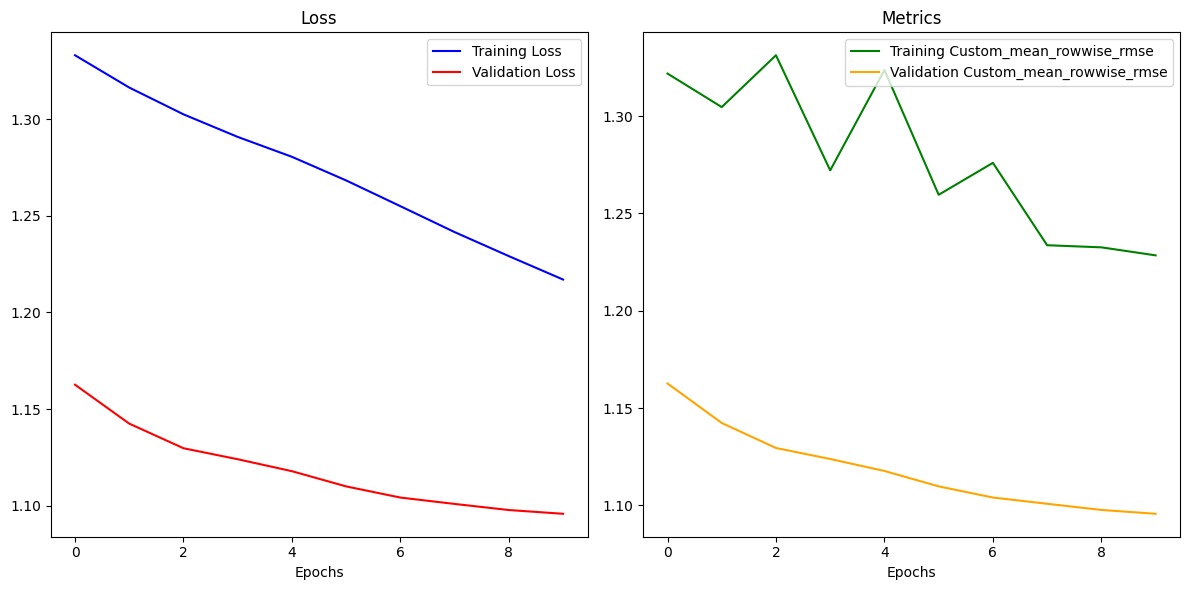

In [32]:
plot_training_history(history_0, metrics=["custom_mean_rowwise_rmse"])

Model is not learning shit and it is underfitting XD

Let me try giving it some more neurons and maybe switch up the learning rate.

In [33]:
tf.random.set_seed(42)

model_1 = Sequential([
        Dense(1024, activation='tanh'),
        Dense(512, activation='tanh'),
        Dense(18211, activation='linear')
])

model_1.compile(loss=mean_rowwise_rmse_loss,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=[custom_mean_rowwise_rmse])

history_1 = model_1.fit(X_train, y_train,
           epochs=30,
           validation_data=(X_val, y_val),
           verbose=100,
           callbacks=[create_model_checkpoint('model_1', monitor='val_mean_rowwise_rmse')])

Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


In [34]:
# model_1.load_weights("model_1")
calculate_mae_and_mrrmse(model=model_1, data=X_test, y_true=y_test)

93/93 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.7263997793611672
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.044834565653364


In [35]:
calculate_mae_and_mrrmse(model=model_1, data=full_features, y_true=full_labels)

614/614 [==============================] - 1s 1ms/step
Mean Absolute Error (MAE): 0.7111955836086448
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.0271476861560316


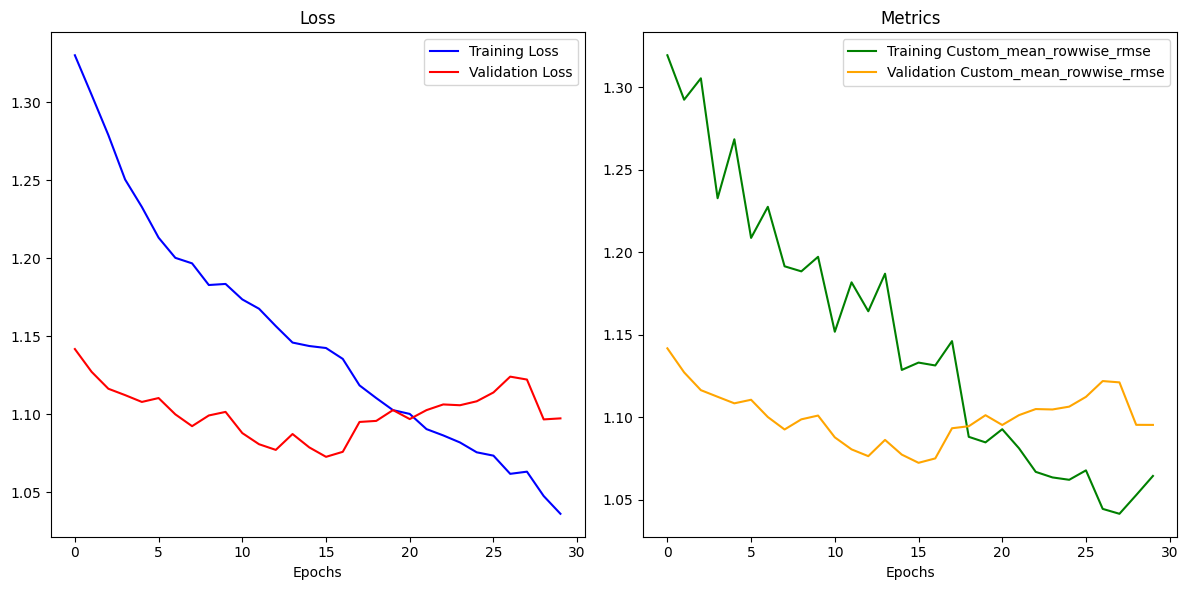

In [36]:
plot_training_history(history_1, metrics=['custom_mean_rowwise_rmse'])

Still bad! Improvable, by adding more neurons and trying different activations

In [37]:
tf.random.set_seed(42)

model_2 = Sequential([
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        BatchNormalization(),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(18211, activation='linear')
])

model_2.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=['mae'])

history_2 = model_2.fit(X_train, y_train,
           epochs=30,
           validation_data=(X_val, y_val),
           verbose=100,
           callbacks=[create_model_checkpoint('model_2', monitor='val_mae')])

Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


In [38]:
calculate_mae_and_mrrmse(model=model_2, data=X_test, y_true=y_test)

93/93 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.7446103902798595
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.1264384361457167


In [39]:
calculate_mae_and_mrrmse(model=model_2, data=full_features, y_true=full_labels)

614/614 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 0.7889952277318519
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.2126959032884554


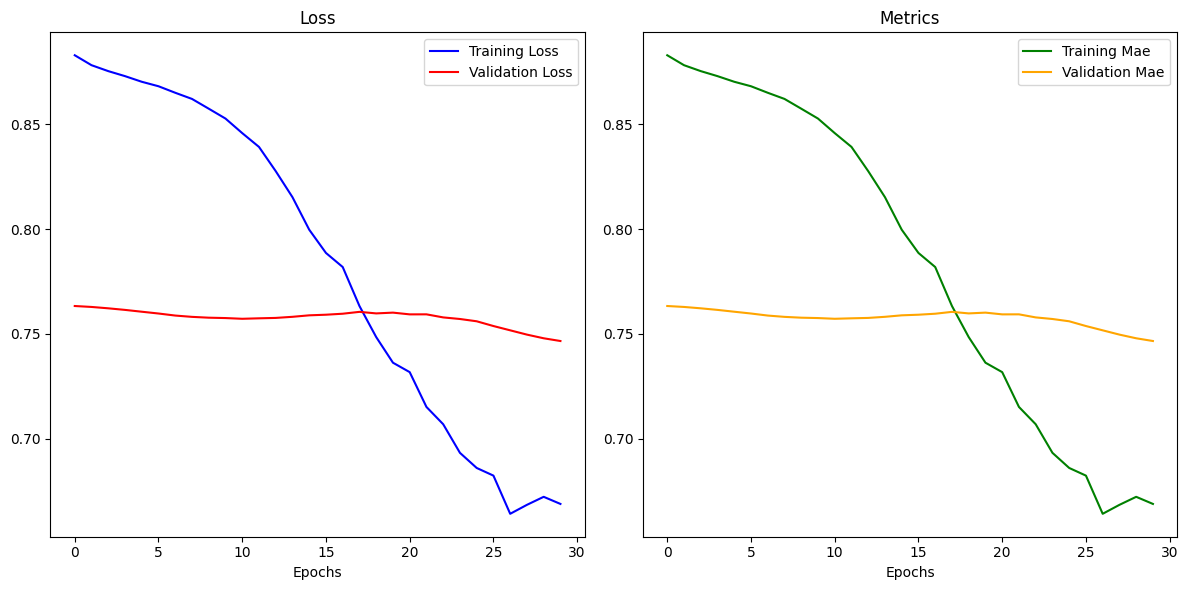

In [40]:
#  Visualize the learning from our helper functions
plot_training_history(history_2, metrics=["mae"])

In [41]:
tf.random.set_seed(42)

# clone model 2
model_3 = Sequential([ 
    Dense(2048),
    BatchNormalization(),
    Activation("relu"),
    Dense(1024, activation="relu"),
    Dense(512, activation="relu"),
    Dense(18211,activation= "linear")
])

model_3.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0027),
                metrics=[custom_mean_rowwise_rmse])

history_3 = model_3.fit(X_train, y_train,
                       epochs=25,
                       validation_data=(X_val,y_val),
                       callbacks=[create_model_checkpoint("model_3", monitor="val_custom_mean_rowwise_rmse")])

Epoch 1/25
14/14 [==============================] - 4s 113ms/step - loss: 0.8755 - custom_mean_rowwise_rmse: 1.3198 - val_loss: 0.7600 - val_custom_mean_rowwise_rmse: 1.1731
Epoch 2/25
14/14 [==============================] - 1s 64ms/step - loss: 0.8451 - custom_mean_rowwise_rmse: 1.2795 - val_loss: 0.7586 - val_custom_mean_rowwise_rmse: 1.1711
Epoch 3/25
14/14 [==============================] - 1s 73ms/step - loss: 0.8353 - custom_mean_rowwise_rmse: 1.2888 - val_loss: 0.7583 - val_custom_mean_rowwise_rmse: 1.1707
Epoch 4/25
14/14 [==============================] - 2s 112ms/step - loss: 0.7700 - custom_mean_rowwise_rmse: 1.1769 - val_loss: 0.7544 - val_custom_mean_rowwise_rmse: 1.1655
Epoch 5/25
14/14 [==============================] - 0s 7ms/step - loss: 0.7142 - custom_mean_rowwise_rmse: 1.1395 - val_loss: 0.7581 - val_custom_mean_rowwise_rmse: 1.1699
Epoch 6/25
14/14 [==============================] - 0s 7ms/step - loss: 0.7133 - custom_mean_rowwise_rmse: 1.1023 - val_loss: 0.7556 -

I really dont know what I am doing wrong at this point but let's just proceed!

In [42]:
model_3.load_weights("model_3")
calculate_mae_and_mrrmse(model=model_3, data=X_test, y_true=y_test)

93/93 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.7016921099083961
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.0698954423925844


In [43]:
calculate_mae_and_mrrmse(model=model_3, data=full_features, y_true=full_labels)

614/614 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 0.6937555122147301
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.0864006255392211


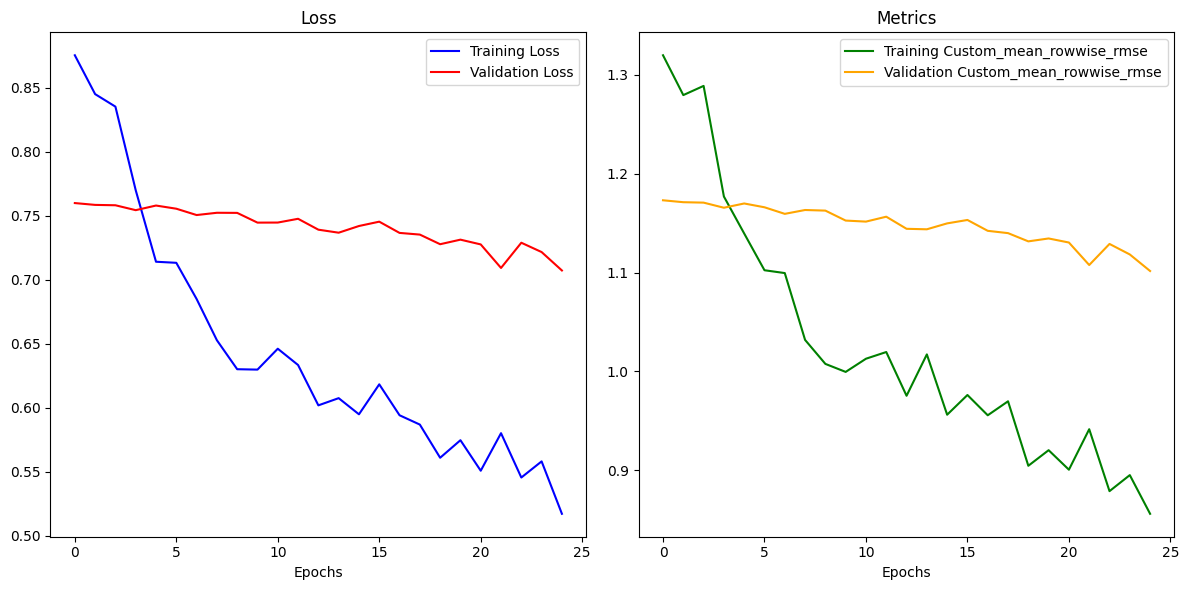

In [44]:
plot_training_history(history_3, metrics=["custom_mean_rowwise_rmse"])

Random but let me now try K-fold validation on the data

In [45]:
tf.random.set_seed(42)


model_4 = Sequential([ 
    Dense(2048),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.01),
    Dense(1024, activation="relu"),
    Dropout(0.1),
    Dense(512, activation="relu"),
    Dense(18211,activation= "linear")
])

model_4.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[custom_mean_rowwise_rmse])

In [46]:
from sklearn.model_selection import KFold

# Define the number of folds (K)
num_folds = 10

# Initialize lists to store the model's performance scores
mae_scores = []
mrrmse_scores = []

# Initialize the KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=51)

# Loop through the K folds
for train_index, val_index in kf.split(full_features):
    # Convert indices to integers and split the data
    train_index = train_index.astype(int)
    val_index = val_index.astype(int)
    X_train_, X_val_ = full_features[train_index], full_features[val_index]
    y_train_, y_val_ = full_labels[train_index], full_labels[val_index]

    # Train the model on X_train and y_train
    model_4.fit(X_train_, y_train_, epochs=50, verbose=0)

    # Make predictions on the validation set
    y_preds = model_4.predict(X_val_)

    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val_, y_preds)
    mae_scores.append(mae)

    # Calculate the Mean Rowwise Root Mean Square Error (MRRMSE)
    rowwise_rmse = np.sqrt(np.mean(np.square(y_val_ - y_preds), axis=1))
    mrrmse_score = np.mean(rowwise_rmse)
    mrrmse_scores.append(mrrmse_score)

# Calculate the mean and standard deviation of MAE and MRRMSE scores
mean_mae = np.mean(mae_scores)
mean_mrrmse = np.mean(mrrmse_scores)

# Print the results
print(f'Average MAE across {num_folds} folds: {mean_mae:.4f} ')
print(f'Average MRRMSE across {num_folds} folds: {mean_mrrmse:.4f}')

2/2 [==============================] - 0s 3ms/step
Average MAE across 10 folds: 0.4354 
Average MRRMSE across 10 folds: 0.6619


Okay this is cool!

Now predict!

In [47]:
preds = model_4.predict(one_hot_test.toarray(), batch_size=1)

255/255 [==============================] - 0s 1ms/step


In [48]:
preds.shape

(255, 18211)

In [49]:
sample_columns = sample_submission.columns
sample_columns= sample_columns[1:]
submission_df = pd.DataFrame(preds, columns=sample_columns)

In [50]:
submission_df.insert(0, 'id', range(255))

In [51]:
sample_submission

,id,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
submission_df

,id,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0,0.378104,0.232901,0.420680,0.658075,0.616343,0.077599,-0.043057,0.382574,-0.437505,...,-0.446626,-0.672747,-0.320242,0.057376,0.097012,0.465451,0.395391,-0.181147,-0.416701,-0.288787
1,1,-0.157644,0.191005,0.088178,-0.122980,0.344602,0.338661,0.007687,0.281311,0.021366,...,0.021453,-0.060572,-0.028569,0.386245,0.133371,0.421965,0.073521,-0.044356,-0.195969,-0.325115
2,2,0.264112,-0.033525,0.059132,0.071405,1.084483,0.707760,0.288914,0.475884,0.353035,...,0.350142,0.076340,0.328603,0.611753,0.293499,0.624696,0.629118,0.413509,-0.151364,0.184253
3,3,-0.101726,0.031811,0.338943,0.317277,0.368774,0.436427,-0.194624,0.298777,-0.013417,...,-0.220944,-0.067998,-0.235572,0.092713,0.174477,0.315335,0.648552,-0.156143,-0.114357,-0.204256
4,4,0.477778,-0.156412,0.031788,0.413898,0.759209,0.377844,-0.049362,0.442162,0.313319,...,-0.350578,-0.129677,0.208891,0.336200,0.043799,1.188364,0.439179,0.776865,-0.329679,0.355072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,0.145811,0.038517,0.108210,-0.040983,0.501567,0.218429,0.312009,0.664530,0.173035,...,-0.029765,-0.579692,-0.768803,-0.212570,0.023363,-0.114804,-0.411990,-0.157746,-1.124115,-0.524361
251,251,0.598693,-0.004134,0.214585,-0.012569,1.861165,0.879924,0.298171,0.374140,0.244948,...,-0.521130,-0.103250,-0.107550,-0.161564,0.365082,0.127279,-0.181509,-0.478520,-0.497164,-0.034026
252,252,0.315442,-0.010127,-0.522027,-0.102644,0.426235,0.060751,0.207609,0.574813,0.284629,...,-0.363349,-0.262244,-0.190920,-0.069522,0.241627,0.037076,-0.097347,0.147342,-0.507750,-0.147973
253,253,1.746401,1.273022,-5.314059,0.993781,6.700181,5.334512,0.703232,-0.623520,-0.170401,...,0.301507,-0.306210,-5.746312,-1.131348,0.800452,-0.588035,-2.542328,0.034790,0.661251,0.239777


In [53]:
submission_df.to_csv("submission.csv", index=False)

In [54]:
!zip submission_preds.zip /kaggle/working/submission.csv

  adding: kaggle/working/submission.csv (deflated 57%)
